In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
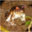

In [ ]:
X_train[0]

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

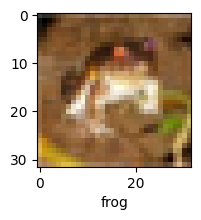

In [ ]:
plot_sample(X_train, y_train, 0)

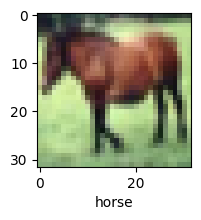

In [ ]:
plot_sample(X_train, y_train, 7)

In [ ]:
# Normalize pixel values from 0–255 to 0–1 for stable and faster training
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)


In [ ]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ANN.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ANN.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.3026 - loss: 1.9357
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 82ms/step - accuracy: 0.4195 - loss: 1.6377
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.4508 - loss: 1.5577
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4762 - loss: 1.4875
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 87ms/step - accuracy: 0.4967 - loss: 1.4346
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.5118 - loss: 1.3822
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5248 - loss: 1.3538
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5384 - loss: 1.3230
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 82ms/step - accuracy: 0.5438 - loss: 1.2844
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5623 - loss: 1.2451


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.44      0.47      1000
           1       0.59      0.51      0.55      1000
           2       0.61      0.07      0.12      1000
           3       0.37      0.28      0.32      1000
           4       0.43      0.41      0.42      1000
           5       0.46      0.24      0.32      1000
           6       0.59      0.41      0.48      1000
           7       0.56      0.48      0.51      1000
           8       0.34      0.84      0.48      1000
           9       0.36      0.68      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.48      0.43      0.41     10000
weighted avg       0.48      0.43      0.41     10000



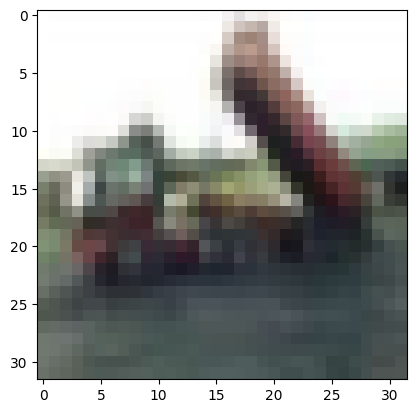

In [ ]:
plt.imshow(X_train[2])

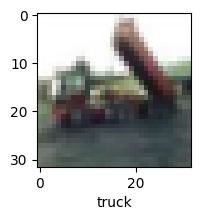

In [ ]:
plot_sample(X_train, y_train, 2)

In [ ]:
CNN = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [ ]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3627 - loss: 1.7551
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5819 - loss: 1.1849
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6330 - loss: 1.0499
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6661 - loss: 0.9600
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6866 - loss: 0.9000
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7066 - loss: 0.8402
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7155 - loss: 0.8100
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7349 - loss: 0.7679
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7417 - loss: 0.7407
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7549 - loss: 0.7111


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


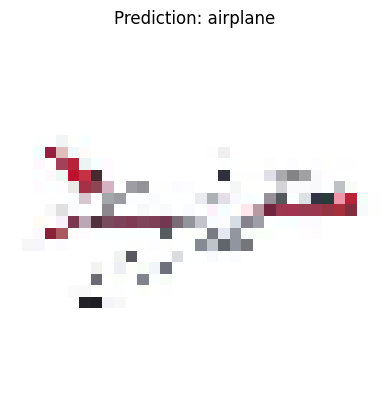

Predicted class: airplane


In [ ]:
from tensorflow.keras.preprocessing import image

# Load your image
img_path = "/content/Airplane.jpg"  # replace with your image path
img = image.load_img(img_path, target_size=(32, 32))  # CIFAR-10 size
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict
pred = CNN.predict(img_array)  # your trained model
pred_class_index = np.argmax(pred)  # pick highest probability
pred_class_name = classes[pred_class_index]

# Show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {pred_class_name}")
plt.show()

print("Predicted class:", pred_class_name)

In [ ]:
CNN = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

     layers.Conv2D(filters=128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])


In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9)
CNN.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.2890 - loss: 1.9111
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.5532 - loss: 1.2568
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6314 - loss: 1.0468
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6792 - loss: 0.9248
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7157 - loss: 0.8207
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7366 - loss: 0.7492
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7636 - loss: 0.6812
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7770 - loss: 0.6305
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7967 - loss: 0.5822
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8090 - loss: 0.5443


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


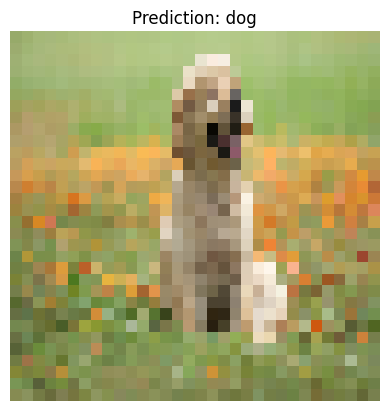

Predicted class: dog


In [ ]:
from tensorflow.keras.preprocessing import image

# Load your image
img_path = "/content/Dog2.avif"  # replace with your image path
img = image.load_img(img_path, target_size=(32, 32))  # CIFAR-10 size
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict
pred = CNN.predict(img_array)  # your trained model
pred_class_index = np.argmax(pred)  # pick highest probability
pred_class_name = classes[pred_class_index]

# Show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {pred_class_name}")
plt.show()

print("Predicted class:", pred_class_name)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']